# Spec2Vec API – Quickstart

*In order to use omigami, you need an access token provided by DataRevenue.*
## Introduction

This is a short guide on how you can add GNPS library matches to your mass spectra - using Omigami's Spec2Vec API.

The API uses a Spec2Vec model that was trained on the entire GNPS spectral library. It embeds each of your spectra into a vector space and calculates the cosine similarity to all GNPS library spectra in this vector space. It then returns you the top library matches for each of your spectra. To learn more about Spec2Vec read our gentle introduction: [Spec2Vec: The Next Step in Mass Spectral Similarity Metrics](https://www.datarevenue.com/en-blog/spec2vec-mass-spectral-similarity-metric)

This notebook shows you how 
1. Specify any MGF file
2. Run a library search through the Spec2Vec API
3. Save the results as XLSX.

Before starting, make sure you have an omigami.com account and have setup your credentials in your working machine like described [here](https://github.com/omigami/omigami#configuration)

# 1. (Down)load an MS/MS dataset (MGF format)

We'll use a small MS/MS dataset in the MGF format from [here](https://gnps-external.ucsd.edu/gnpslibrary/GNPS-COLLECTIONS-MISC.mgf).
You can also select any other from the [GNPS spectral library](https://gnps-external.ucsd.edu/gnpslibrary), or - of course - use your own.

*Note that you will need either `Precursor_MZ` or `PEPMASS` fields and the abundance pairs in your MGF file.*

In [1]:
# Load your own MS/MS dataset (and skip the next cell)
path_to_mgf = 'GNPS-COLLECTIONS-MISC.mgf'

In [2]:
# OR download a small MS/MS dataset from GNPS, in the same directory as this notebook
import urllib.request

url = 'https://gnps-external.ucsd.edu/gnpslibrary/GNPS-COLLECTIONS-MISC.mgf'

path_to_mgf = f'GNPS-COLLECTIONS-MISC.mgf' # use your prefered saving path here

urllib.request.urlretrieve(url, path_to_mgf)

('GNPS-COLLECTIONS-MISC.mgf', <http.client.HTTPMessage at 0x7fd5c000e350>)

# 2. Query for the best matches with Spec2Vec

`Spec2Vec` is a python wrapper which:
- Builds a json payload from the MGF file
- Calls the Spec2Vec API
- Formats the prediction results into readable dataframes

____
`match_spectra()` takes the following arguments:
- `source` takes a string as a path to mgf file or a list of `matchms.Spectrum` objects.
- `n_best` sets the number of matches you'd like per spectrum.
- `ion_mode` selects the ionization mode of the measured spectra. (positive or negative)

In the results dataframes, the input spectra can be identified by their number in the dataframes index, which refers to their order in the MGF file.
*i.e.* `matches of spectrum 1` gives the spectrum_id and Spec2Vec scores of the library spectra matches, for the first spectrum in the MGF file.

For each spectrum in the MGF file, the library spectra matches are sorted according to their Spec2Vec similarity score (best is first).   
The following information about the predicted spectra are returned:
- `score`, the Spec2Vec similarity score between the input spectrum and the library spectrum
- `matches of spectrum #`, the spectrum_ID of the matched library spectra for the spectrum number # in the MGF file
- `metadata`, all available metadata fields

In [3]:
from omigami.spectra_matching import Spec2Vec

In [4]:
# Initialize the client
client = Spec2Vec()

In [5]:
# Run Spec2Vec library search
spectra_matches = client.match_spectra(
    path_to_mgf,
    n_best=10,
    ion_mode="positive"
)

## 2.1 View results
A list of dataframes is returned. To look at a specific dataframe you can call:
```python
spec2vec_matches[i]  # 'i' refers to the index of the spectrum in the MGF file input
```

In [6]:
spectra_matches[0]

,score,adduct,cas_number,charge,compound_name,compound_source,create_time,data_collector,exactmass,formula_inchi,...,source_file,spectrum_id,spectrum_status,spectrumid,splash,submit_user,task,task_id,url,user_id
matches of spectrum-0,,,,,,,,,,,,,,,,,,,,,
CCMSLIB00000425025,0.551108,M+H,148473-00-1,1,Hymenamide B,Isolated,2015-02-20 10:43:58.0,Williams,830.396,,...,f.philipwi/GNPS_Marine_Invertebrate_Secondary_...,CCMSLIB00000425025,1,CCMSLIB00000425025,splash10-0006-0193000000-0193000000,philipwi,2a233db354204f2d9690147ffcd71a84,2a233db354204f2d9690147ffcd71a84,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,null
CCMSLIB00005725325,0.546808,M+Na,N/A,1,"19-(1-hydroxyethyl)-3,13,17-triazapentacyclo[1...",Isolated,2020-11-03 21:54:04.0,Luis Quiros-Guerrero,331.132,C20H17N3O2,...,MSV000086303/peak/PF017811_pos/200302_LQ_46671...,CCMSLIB00005725325,1,CCMSLIB00005725325,null-null-null-null,mpanitchpakdi,5c7943c413a14015969545069c9b9c83,5c7943c413a14015969545069c9b9c83,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,null
CCMSLIB00005725129,0.545683,M+Na,N/A,1,"4,7,7-trimethylbicyclo[2.2.1]heptan-2-yl (2E)-...",Isolated,2020-11-03 21:53:27.0,Luis Quiros-Guerrero,330.183,C20H26O4,...,MSV000086302/peak/PF017796_pos/200728_LQ_PF001...,CCMSLIB00005725129,1,CCMSLIB00005725129,null-null-null-null,mpanitchpakdi,47c70d8ebaf44da2b750e27d914a5ac2,47c70d8ebaf44da2b750e27d914a5ac2,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,null
CCMSLIB00005436063,0.491435,M+H,,1,Arcabucoine,Lysate,2019-06-26 16:39:54.0,ANGOLINI,353.126,,...,f.amazonia/Library/C14j.mzXML;,CCMSLIB00005436063,1,CCMSLIB00005436063,null-null-null-null,amazonia,d9e36297f00d415b96d52a6693c72011,d9e36297f00d415b96d52a6693c72011,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,null
CCMSLIB00000081750,0.475527,M+H,56258-32-3,1,Altertoxin I,Isolated,2014-05-27 12:26:35.0,Monica Pupo,352.095,C20H16O6,...,gnps_AltertoxinI_pos_MplusH.mgf,CCMSLIB00000081750,1,CCMSLIB00000081750,splash10-014i-0009000000-0009000000,rsilva,52bd5f0db6314c93924d5ce5c86348eb,52bd5f0db6314c93924d5ce5c86348eb,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,null
CCMSLIB00000531520,0.365203,M+H,,1,putative analog of trichodinA,Lysate,2015-10-23 15:29:15.0,negarg,353.199,,...,f.zengyi88516/140412_Maxis_Impact_lichen_micro...,CCMSLIB00000531520,1,CCMSLIB00000531520,splash10-0udi-1269000000-1269000000,negarg,93b84c455303400aaa7972f5200cd311,b4cae132f42347eab51c94b3cbda09e8,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,null
CCMSLIB00005725344,0.338543,M+H,N/A,1,"methyl (1R,14S,15E)-15-ethylidene-17-methyl-12...",Isolated,2020-11-03 21:54:04.0,Luis Quiros-Guerrero,352.179,C21H24N2O3,...,MSV000086303/peak/PF017811_pos/200302_LQ_46674...,CCMSLIB00005725344,1,CCMSLIB00005725344,null-null-null-null,mpanitchpakdi,5c7943c413a14015969545069c9b9c83,5c7943c413a14015969545069c9b9c83,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,null
CCMSLIB00000579243,0.332151,M+H,,1,8-oxocanadine,Isolated,2016-03-09 11:39:11.0,Emily Britton,354.133,,...,f.erbritto/GS-Standards-complete/8-oxocanadine...,CCMSLIB00000579243,1,CCMSLIB00000579243,splash10-004i-0902000000-0902000000,erbritto,216dedc2e5be4a8b979b6936b7c881d9,216dedc2e5be4a8b979b6936b7c881d9,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,null
CCMSLIB00000068234,0.317541,M+H-H2O,N/A,1,"""R-4-benzyl-3-((R)-3-hydroxy-2,2-dimethyloct-7...",isolated,2014-03-14 15:04:29.0,Garg/Luzzato,371.21,,...,2B1_R-4-benzyl-3-((R)-3-hydroxy-2_2-dimethyloc...,CCMSLIB00000068234,1,CCMSLIB00000068234,splash10-0udj-0539000000-0539000000,mwang87,0032f231730f48e281f48feabde94c8f,0032f231730f48e281f48feabde94c8f,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,null


# 3. Save results

Execute the following cell to save the results in an Excel file. For readability, each dataframe is saved in its own csv file under the matches directory.

In [7]:
import os
os.makedirs("matches", exist_ok=True)
for i, spectrum_matches in enumerate(spectra_matches):
    spectrum_matches.to_csv(f"matches/spectrum_{i}.csv")

# 4. Create Plots

The following cell will show you an example of how to visualize your matches.

### Creating a Plot of the molecular structure

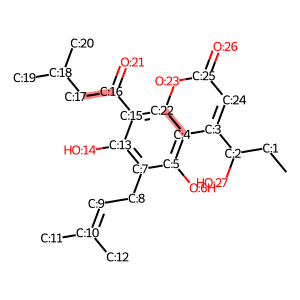

5,7-dihydroxy-4-(1-hydroxypropyl)-6-(3-methylbut-2-en-1-yl)-8-(3-methylbutanoyl)-2H-chromen-2-one


In [8]:
from omigami.plotting import MoleculePlotter
plotter = MoleculePlotter()

plots, legends = plotter.plot_molecule_structure(
    spectra_matches[1],
    draw_indices=True,
    img_size=(300, 300),
    substructure_highlight="C(=O)"
)

first_match = list(plots.values())[0]
display(first_match)
print(legends[0])

### Creating a Spectra Comparison Mirror Plot

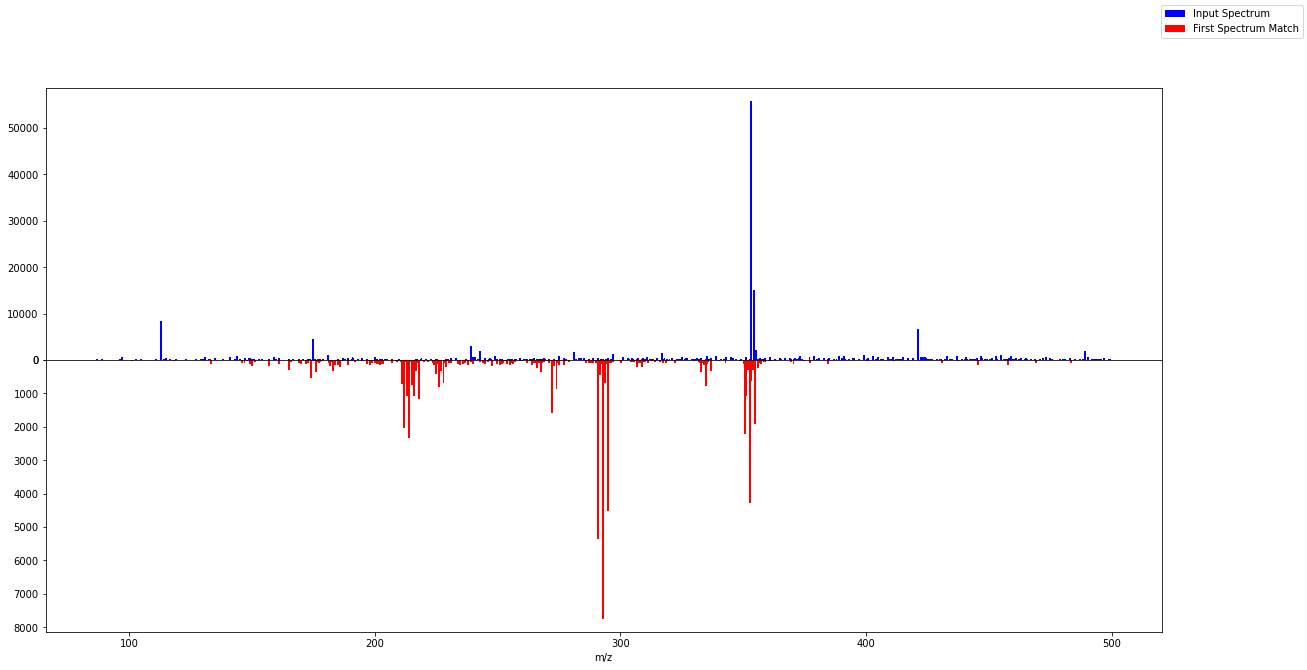

In [9]:
from omigami.plotting import SpectraComparisonPlotter
from omigami.utilities import SpectrumDataFrameHelper
from matchms.importing import load_from_mgf

plotter = SpectraComparisonPlotter()

# lets load in memory our input spectra so we can compare input and output (matches)
input_spectra = list(load_from_mgf(path_to_mgf))

input_df = SpectrumDataFrameHelper.from_spectrum(input_spectra[0])

spectrum_match_id = spectra_matches[0].index[0]
output_df = SpectrumDataFrameHelper.from_gnps_id(spectrum_match_id)

plot = plotter.mirror_plot(
    spectrum_1=input_df,
    spectrum_2=output_df,
    labels=["Input Spectrum", "First Spectrum Match"],
    display_limits=(0,500)
)

### Creating a Plot using the ClassyFire APIm

<BarContainer object of 5 artists>

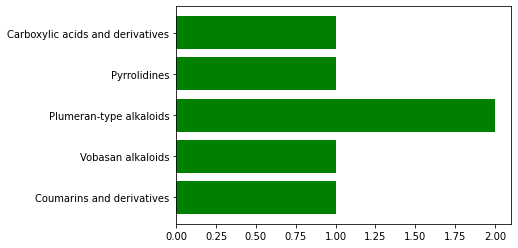

In [10]:
plotter = MoleculePlotter()
plotter.plot_classyfire_result(spectra_matches[1], color="green")

### Creating a Plot using the NP-Classifier API

<BarContainer object of 5 artists>

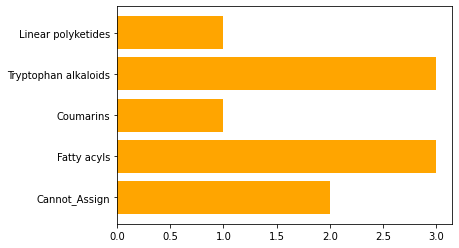

In [11]:
plotter = MoleculePlotter()
plotter.plot_NPclassifier_result(spectra_matches[1], color="orange")

____